In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 487.6 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 871.5 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 944.1 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.757024,0.812242,-4.654852e-07,0.695026,0.811228,0.000032,0.631795,0.757988,0.000448,0.590007,...,0.668136,0.560075,-0.029671,0.620885,0.581559,-0.033196,0.595624,0.617317,-0.031104,0
1,0.758443,0.806698,-5.215708e-07,0.699092,0.811367,0.001202,0.638629,0.756578,0.004268,0.597735,...,0.666228,0.558657,-0.030860,0.619569,0.581068,-0.036380,0.594650,0.618940,-0.036660,0
2,0.769970,0.820147,-5.172172e-07,0.696268,0.812060,0.005952,0.633244,0.756271,0.008499,0.591185,...,0.665806,0.554521,-0.026944,0.620116,0.576698,-0.031269,0.597032,0.615902,-0.030692,0
3,0.767250,0.808249,-5.223900e-07,0.700635,0.806997,0.000138,0.637346,0.751580,0.002103,0.596187,...,0.672730,0.552766,-0.028236,0.627486,0.576958,-0.033561,0.603200,0.617822,-0.033334,0
4,0.781907,0.791398,-4.676615e-07,0.717457,0.795084,-0.004233,0.651572,0.743279,-0.003599,0.607927,...,0.697293,0.537929,-0.024779,0.651801,0.555984,-0.030377,0.626876,0.593170,-0.030702,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36994,0.208051,0.723211,2.443581e-07,0.189835,0.759606,-0.066654,0.193745,0.796990,-0.117177,0.218575,...,0.396892,0.795222,-0.130389,0.395115,0.805200,-0.141160,0.384374,0.802184,-0.147658,ຫຍັງ
36995,0.607703,0.714809,8.900346e-08,0.552093,0.620745,-0.009518,0.468469,0.602034,-0.009830,0.405480,...,0.434638,0.800986,-0.016485,0.445857,0.780169,-0.006797,0.466073,0.774821,-0.002539,ຫຍັງ
36996,0.611430,0.713386,5.540479e-08,0.552559,0.621566,-0.007269,0.472066,0.606512,-0.005346,0.410631,...,0.437869,0.803757,-0.012753,0.448580,0.780705,-0.003516,0.469701,0.773734,0.000127,ຫຍັງ
36997,0.626729,0.711910,1.771242e-08,0.568959,0.615667,-0.009430,0.484793,0.599592,-0.006317,0.425242,...,0.458965,0.799688,-0.017545,0.469275,0.774946,-0.008844,0.490124,0.769343,-0.005822,ຫຍັງ


In [28]:

df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.757024,0.812242,-4.654852e-07,0.695026,0.811228,0.000032,0.631795,0.757988,0.000448,0.590007,...,0.668136,0.560075,-0.029671,0.620885,0.581559,-0.033196,0.595624,0.617317,-0.031104,0
1,0.758443,0.806698,-5.215708e-07,0.699092,0.811367,0.001202,0.638629,0.756578,0.004268,0.597735,...,0.666228,0.558657,-0.030860,0.619569,0.581068,-0.036380,0.594650,0.618940,-0.036660,0
2,0.769970,0.820147,-5.172172e-07,0.696268,0.812060,0.005952,0.633244,0.756271,0.008499,0.591185,...,0.665806,0.554521,-0.026944,0.620116,0.576698,-0.031269,0.597032,0.615902,-0.030692,0
3,0.767250,0.808249,-5.223900e-07,0.700635,0.806997,0.000138,0.637346,0.751580,0.002103,0.596187,...,0.672730,0.552766,-0.028236,0.627486,0.576958,-0.033561,0.603200,0.617822,-0.033334,0
4,0.781907,0.791398,-4.676615e-07,0.717457,0.795084,-0.004233,0.651572,0.743279,-0.003599,0.607927,...,0.697293,0.537929,-0.024779,0.651801,0.555984,-0.030377,0.626876,0.593170,-0.030702,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36994,0.208051,0.723211,2.443581e-07,0.189835,0.759606,-0.066654,0.193745,0.796990,-0.117177,0.218575,...,0.396892,0.795222,-0.130389,0.395115,0.805200,-0.141160,0.384374,0.802184,-0.147658,ຫຍັງ
36995,0.607703,0.714809,8.900346e-08,0.552093,0.620745,-0.009518,0.468469,0.602034,-0.009830,0.405480,...,0.434638,0.800986,-0.016485,0.445857,0.780169,-0.006797,0.466073,0.774821,-0.002539,ຫຍັງ
36996,0.611430,0.713386,5.540479e-08,0.552559,0.621566,-0.007269,0.472066,0.606512,-0.005346,0.410631,...,0.437869,0.803757,-0.012753,0.448580,0.780705,-0.003516,0.469701,0.773734,0.000127,ຫຍັງ
36997,0.626729,0.711910,1.771242e-08,0.568959,0.615667,-0.009430,0.484793,0.599592,-0.006317,0.425242,...,0.458965,0.799688,-0.017545,0.469275,0.774946,-0.008844,0.490124,0.769343,-0.005822,ຫຍັງ


In [29]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (36999, 63)
Labels shape = (36999,)


In [30]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [31]:

y_pred = svm.predict(x_test)
y_pred

array(['ສະບາຍດີ(ສຸຂະພາບ)', 'ສະບາຍດີ(ສຸຂະພາບ)', 'ຕອນສວາຍ', ..., '4',
       'ດຽວນີ້', 'ກະລຸນາ'], dtype=object)

In [32]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9732432432432433, 0.9732432432432433, 0.9732432432432433)

In [39]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are the true labels and predicted labels, respectively, for your test data
# Assuming each class in y_test and y_pred corresponds to a hand sign

# Compute accuracy for each hand sign
accuracy_per_class = {}
for sign in set(y_test):  # Assuming y_test contains the true labels for each hand sign
    indices = (y_test == sign)
    accuracy = accuracy_score(y_test[indices], y_pred[indices])
    accuracy_per_class[sign] = accuracy

# Display accuracy for each hand sign
for sign, accuracy in accuracy_per_class.items():
    print(f'Accuracy for hand sign {sign}: {accuracy:.2f}')


Accuracy for hand sign ຕອນແລງ: 1.00
Accuracy for hand sign ຂໍໂທດ: 0.95
Accuracy for hand sign 2: 0.99
Accuracy for hand sign 9: 1.00
Accuracy for hand sign 0: 0.99
Accuracy for hand sign ຫຍັງ: 0.94
Accuracy for hand sign ໂຊກດີ: 0.99
Accuracy for hand sign ຕົກລົງ: 0.96
Accuracy for hand sign ຍ້ອນຫຍັງ: 0.96
Accuracy for hand sign ດຽວນີ້: 1.00
Accuracy for hand sign 5: 1.00
Accuracy for hand sign ຊື່: 1.00
Accuracy for hand sign 10: 1.00
Accuracy for hand sign 4: 1.00
Accuracy for hand sign 1.000.000: 1.00
Accuracy for hand sign ຕອນເຊົ້າ: 0.99
Accuracy for hand sign 8: 0.97
Accuracy for hand sign ເຈົ້າ: 0.74
Accuracy for hand sign ເທົ່າໃດ: 0.83
Accuracy for hand sign ກິນ: 0.99
Accuracy for hand sign ສະບາຍດີ(ສຸຂະພາບ): 1.00
Accuracy for hand sign 7: 1.00
Accuracy for hand sign ຕອນສວາຍ: 1.00
Accuracy for hand sign 1: 1.00
Accuracy for hand sign ບໍ່ເປັນຫຍັງ: 1.00
Accuracy for hand sign ເຂົ້າໃຈບໍ່?: 0.99
Accuracy for hand sign ຂອບໃຈ: 0.98
Accuracy for hand sign ຂ້ອຍ: 0.88
Accuracy for hand sig

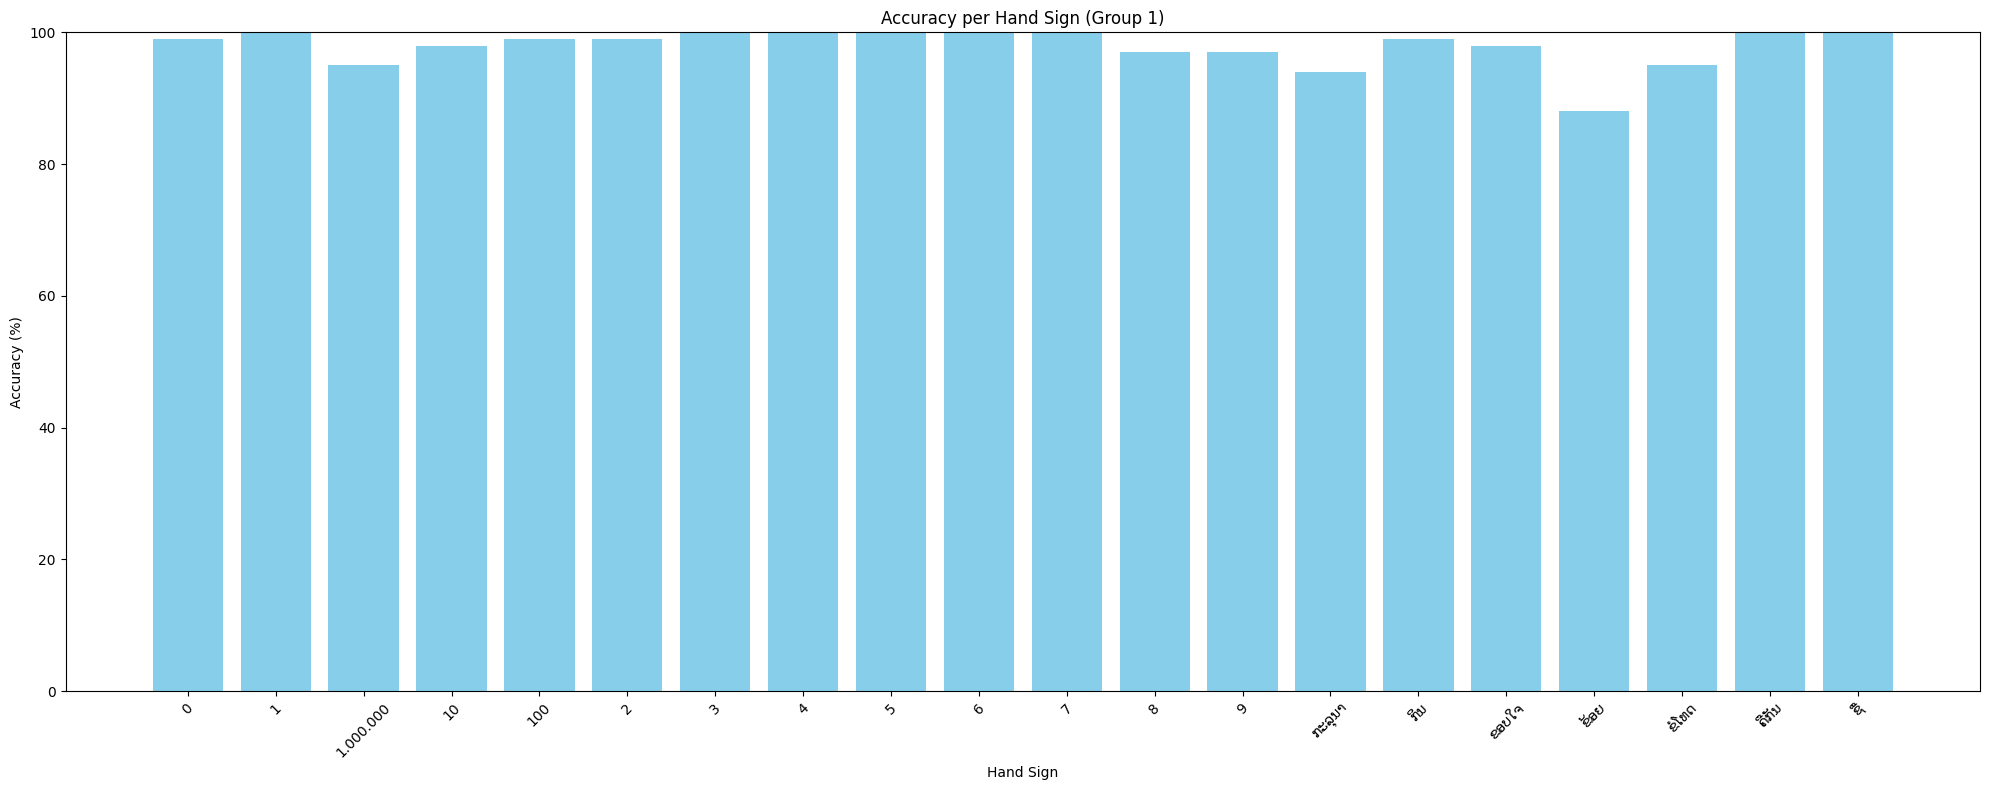

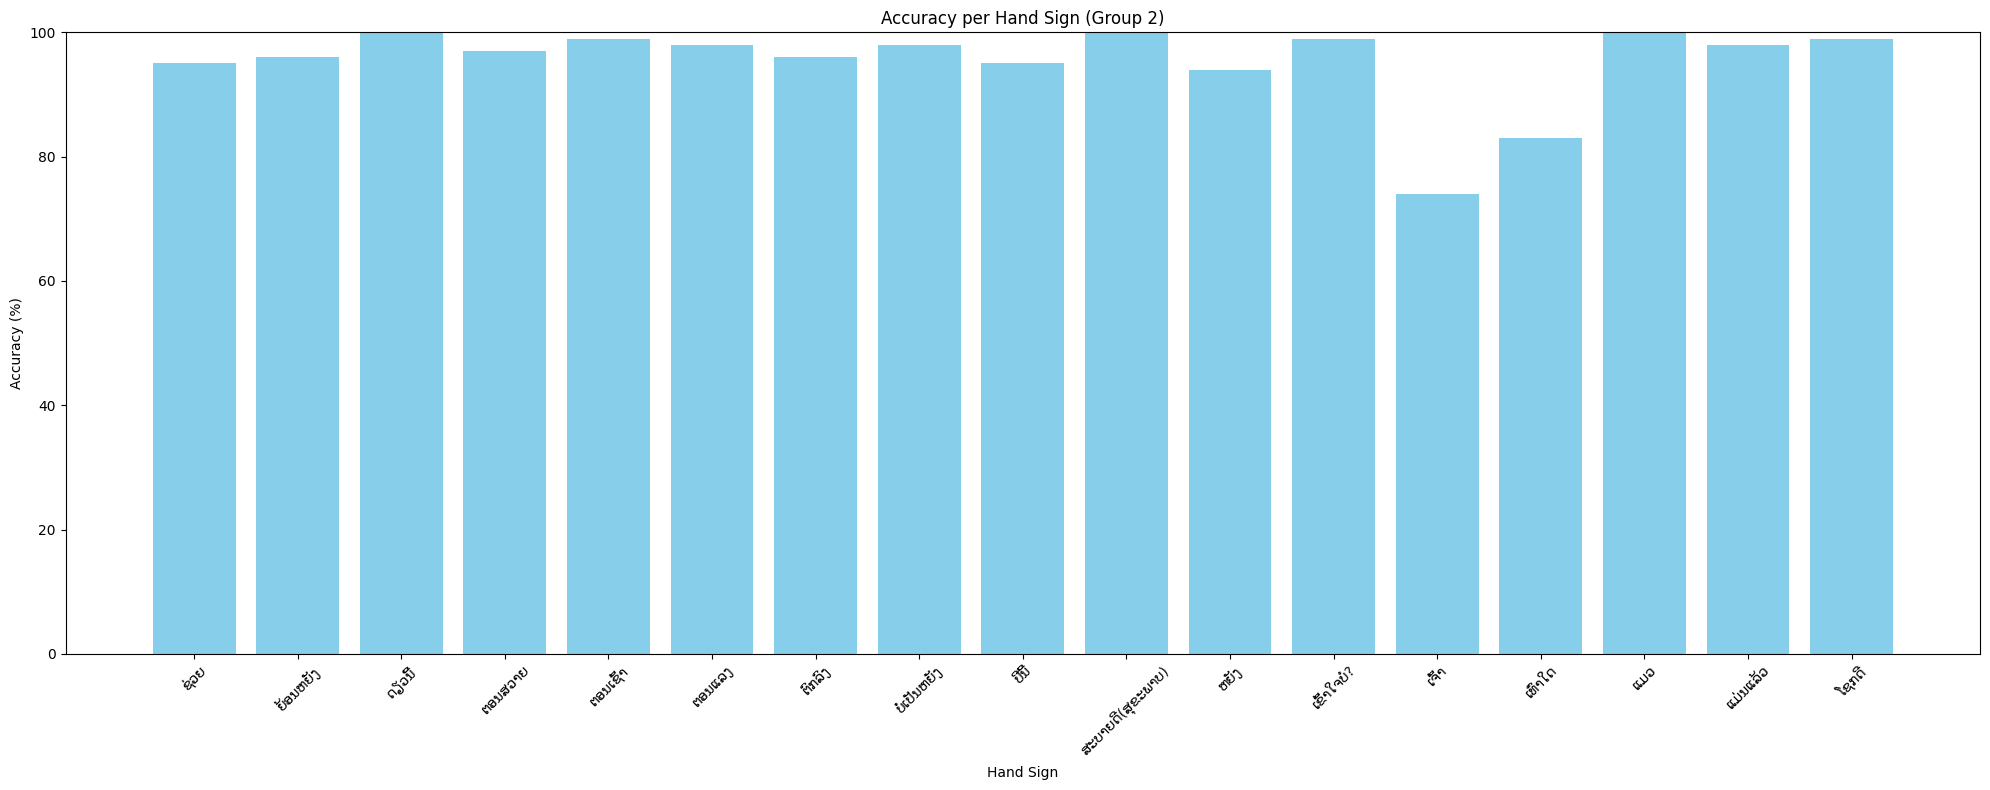

In [53]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual accuracy_per_class dictionary)
accuracy_per_class = {'ຕອນແລງ': 0.98, 'ຂໍໂທດ': 0.95, '2': 0.99, '9': 0.97, '0': 0.99, 'ຫຍັງ': 0.94,
                      'ໂຊກດີ': 0.99, 'ຕົກລົງ': 0.96, 'ຍ້ອນຫຍັງ': 0.96, 'ດຽວນີ້': 1.00,
                      '5': 1.00, 'ຊື່': 1.00, '10': 0.98, '4': 1.00, '1.000.000': 0.95,
                      'ຕອນເຊົ້າ': 0.99, '8': 0.97, 'ເຈົ້າ': 0.74, 'ເທົ່າໃດ': 0.83, 'ກິນ': 0.99,
                      'ສະບາຍດີ(ສຸຂະພາບ)': 1.00, '7': 1.00, 'ຕອນສວາຍ': 0.97, '1': 1.00,
                      'ບໍ່ເປັນຫຍັງ': 0.98, 'ເຂົ້າໃຈບໍ່?': 0.99, 'ຂອບໃຈ': 0.98, 'ຂ້ອຍ': 0.88,
                      'ກະລຸນາ': 0.94, '3': 1.00, 'ປີນີ້': 0.95, 'ແມວ': 1.00, 'ແມ່ນແລ້ວ': 0.98,
                      'ຊ່ວຍ': 0.95, '6': 1.00, '100': 0.99, 'ຄືກັນ': 1.00}

# Sort the accuracy data by sign name
sorted_accuracy = {k: v for k, v in sorted(accuracy_per_class.items(), key=lambda item: item[0])}

# Divide the signs into groups of 10 for separate graphs
sign_groups = [list(sorted_accuracy.keys())[i:i + 20] for i in range(0, len(sorted_accuracy), 20)]
accuracy_groups = [list(sorted_accuracy.values())[i:i + 20] for i in range(0, len(sorted_accuracy), 20)]

# Plotting each group of 10 signs
for i, (sign_group, accuracy_group) in enumerate(zip(sign_groups, accuracy_groups), 1):
    plt.figure(figsize=(20, 8))
    plt.bar(sign_group, [acc * 100 for acc in accuracy_group], color='skyblue')  # Convert to percentages
    plt.xlabel('Hand Sign')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Accuracy per Hand Sign (Group {i})')
    plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentage range
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

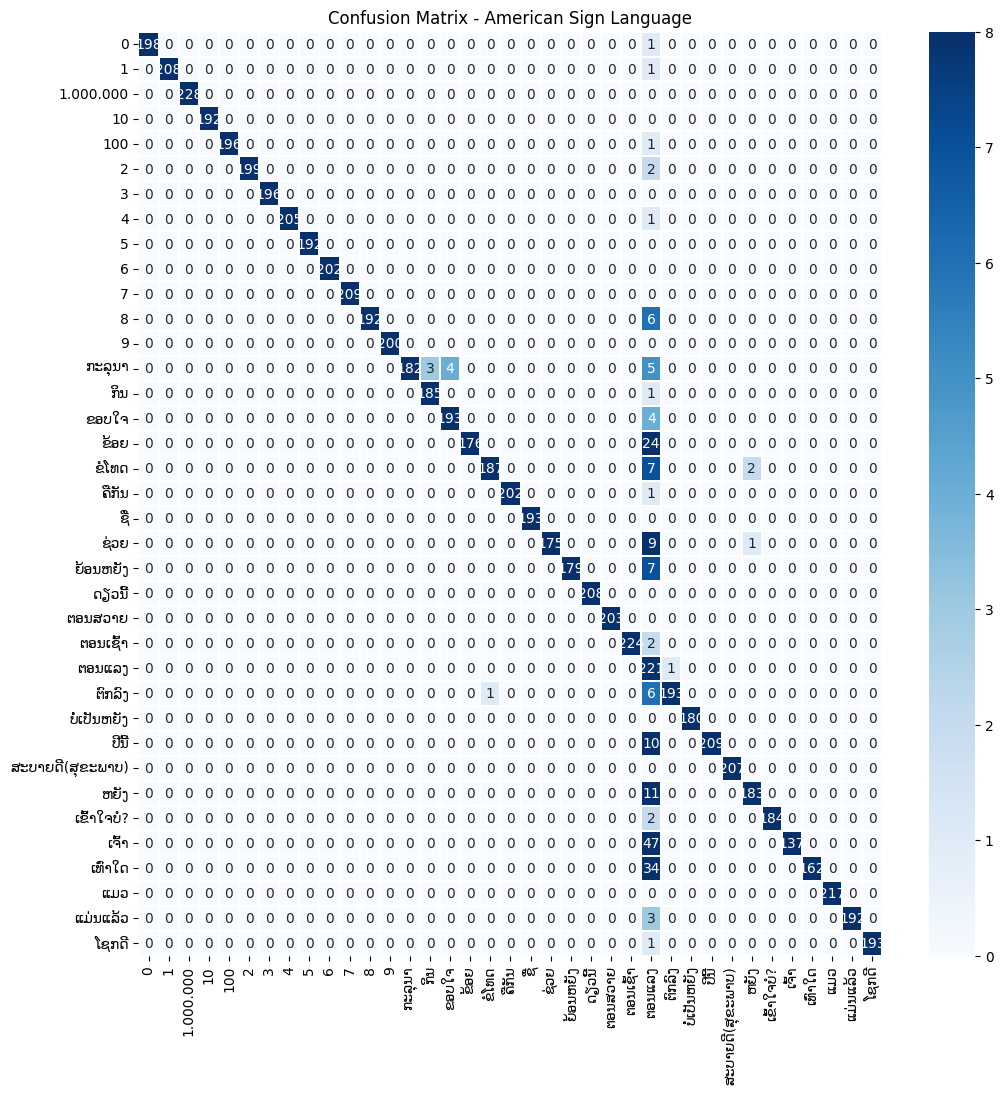

In [33]:

labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Lao Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [34]:
import pickle

# save model
with open('model_mckiler.pkl','wb') as f:
    pickle.dump(svm,f)

In [61]:
# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Get the unique hand signs (classes) in sorted order
hand_signs = sorted(list(set(y_test)))

# Create the table header
table = f"{'ພາສາມື':<20}{'F1 Score (%)':<15}{'Recall (%)':<15}{'Precision (%)':<15}\n"

# Populate the table with metrics for each hand sign
for hand_sign, f1_value, recall_value, precision_value in zip(hand_signs, f1, recall, precision):
    table += f"{hand_sign:<20}{f1_value*100:<15.2f}{recall_value*100:<15.2f}{precision_value*100:<15.2f}\n"

print(table)

ພາສາມື              F1 Score (%)   Recall (%)     Precision (%)  
0                   99.75          99.50          100.00         
1                   99.76          99.52          100.00         
1.000.000           100.00         100.00         100.00         
10                  100.00         100.00         100.00         
100                 99.75          99.49          100.00         
2                   99.50          99.00          100.00         
3                   100.00         100.00         100.00         
4                   99.76          99.51          100.00         
5                   100.00         100.00         100.00         
6                   100.00         100.00         100.00         
7                   100.00         100.00         100.00         
8                   98.46          96.97          100.00         
9                   100.00         100.00         100.00         
ກະລຸນາ              96.81          93.81          100.00         
ກິນ       